In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# df=pd.read_csv('Documents/loan.csv')

In [153]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [155]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [156]:
df.drop(columns=['loan_id'],inplace=True)

In [157]:
matrix=df.select_dtypes(include='number').corr()

In [158]:
import seaborn as sns

<Axes: >

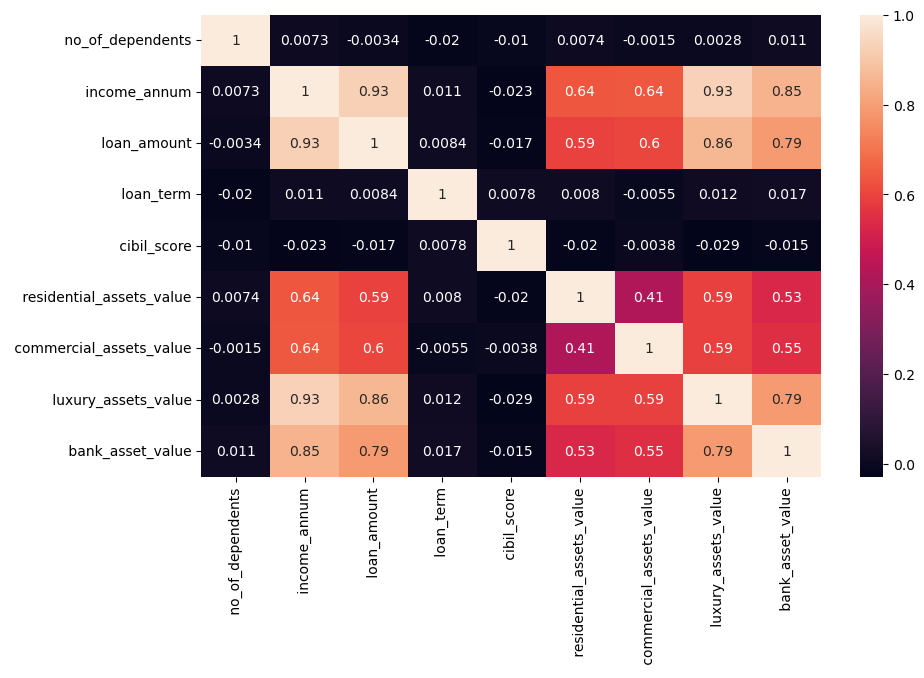

In [159]:
plt.figure(figsize=(10,6))
sns.heatmap(matrix,annot=True)

In [160]:
for col in df.columns:
    df.rename(columns={col:col.strip()},inplace=True)

In [161]:
df['education'].value_counts()

education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='count'>

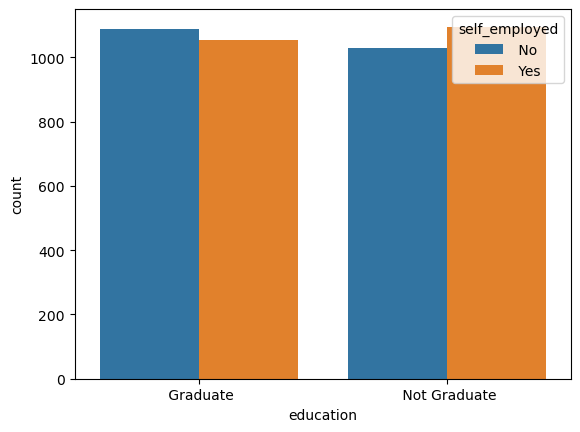

In [162]:
sns.countplot(data=df,x='education',hue='self_employed')

In [163]:
# lets see the income by graduation(mean,median)
mean_graduate=df.groupby('education')['income_annum'].median()

In [164]:
mean_graduate

education
 Graduate        5100000.0
 Not Graduate    5000000.0
Name: income_annum, dtype: float64

In [165]:
cibil_graduate=df.groupby('education')['cibil_score'].median()

In [166]:
cibil_graduate

education
 Graduate        598.5
 Not Graduate    600.0
Name: cibil_score, dtype: float64

In [167]:
# loan_status
loan_status_graduate=df.groupby('education')['loan_status'].value_counts()

In [168]:
loan_status_graduate

education      loan_status
 Graduate       Approved      1339
                Rejected       805
 Not Graduate   Approved      1317
                Rejected       808
Name: count, dtype: int64

In [169]:
# status_chart=pd.DataFrame(loan_status_graduate)

In [170]:
df_graduate=df[df['education']=='Graduate']

In [171]:
df['education'][0]

' Graduate'

In [172]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [173]:
df['education']=df['education'].apply(lambda x:x.strip())

In [174]:
df['self_employed']=df['self_employed'].apply(lambda x:x.strip())
df['loan_status']=df['loan_status'].apply(lambda x:x.strip())

In [175]:
df_not_graduate=df[df['education']=='Not Graduate']

In [176]:
df_not_graduate.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,2125.000000,2.125000e+03,2.125000e+03,2125.000000,2125.000000,2.125000e+03,2.125000e+03,2.125000e+03,2.125000e+03
mean,2.494118,5.026353e+06,1.503689e+07,10.948706,600.741176,7.401224e+06,5.002965e+06,1.501228e+07,4.945929e+06
std,1.691506,2.812759e+06,9.010992e+06,5.669466,174.018796,6.517985e+06,4.447078e+06,9.140460e+06,3.267736e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.600000e+06,7.500000e+06,6.000000,451.000000,2.100000e+06,1.300000e+06,7.200000e+06,2.300000e+06
50%,3.000000,5.000000e+06,1.440000e+07,10.000000,600.000000,5.500000e+06,3.700000e+06,1.440000e+07,4.500000e+06
75%,4.000000,7.500000e+06,2.160000e+07,16.000000,753.000000,1.100000e+07,7.800000e+06,2.140000e+07,7.000000e+06
max,5.000000,9.900000e+06,3.870000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.910000e+07,1.470000e+07


In [177]:
df_graduate=df[df['education']=='Graduate']

In [178]:
df_graduate.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,2144.000000,2.144000e+03,2.144000e+03,2144.000000,2144.000000,2.144000e+03,2.144000e+03,2.144000e+03,2.144000e+03
mean,2.503265,5.091604e+06,1.522915e+07,10.852612,599.138060,7.543377e+06,4.943610e+06,1.523932e+07,5.007183e+06
std,1.700646,2.801239e+06,9.076422e+06,5.749208,170.878372,6.490130e+06,4.331435e+06,9.067943e+06,3.233170e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.800000e+06,6.000000,455.000000,2.300000e+06,1.400000e+06,7.700000e+06,2.400000e+06
50%,3.000000,5.100000e+06,1.470000e+07,10.000000,598.500000,5.700000e+06,3.700000e+06,1.480000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.140000e+07,16.000000,745.250000,1.150000e+07,7.500000e+06,2.180000e+07,7.200000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.850000e+07,1.900000e+07,3.920000e+07,1.460000e+07


In [179]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [180]:
vif=pd.DataFrame()
vif['feature']=df.select_dtypes(include='number').columns

In [181]:
vif['data']=[variance_inflation_factor(df.select_dtypes(include='number').values,i) for i in range(0,len(df.select_dtypes(include='number').columns))]

In [182]:
high_multi_column=vif[vif['data']>6]['feature'].tolist()

In [183]:
df_copy=df.drop(columns=high_multi_column)

In [184]:
# encoding

In [185]:
df_copy['education']=df_copy['education'].map({'Graduate':0,'Not Graduate':1})

In [186]:
df_copy['self_employed']=df['self_employed'].map({'No':0,'Yes':1})

In [187]:
df_copy

,no_of_dependents,education,self_employed,loan_term,cibil_score,residential_assets_value,commercial_assets_value,loan_status
0,2,0,0,12,778,2400000,17600000,Approved
1,0,1,1,8,417,2700000,2200000,Rejected
2,3,0,0,20,506,7100000,4500000,Rejected
3,3,0,0,8,467,18200000,3300000,Rejected
4,5,1,1,20,382,12400000,8200000,Rejected
...,...,...,...,...,...,...,...,...
4264,5,0,1,12,317,2800000,500000,Rejected
4265,0,1,1,20,559,4200000,2900000,Approved
4266,2,1,0,18,457,1200000,12400000,Rejected
4267,1,1,0,8,780,8200000,700000,Approved


In [188]:
df_copy['loan_status']=df['loan_status'].map({'Approved':1,'Rejected':0})

In [192]:
df_copy['loan_status'].value_counts()

loan_status
1    2656
0    1613
Name: count, dtype: int64

In [198]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [199]:
scalar=StandardScaler()

In [200]:
X=df_copy.drop(columns=['loan_status'])
y=df_copy['loan_status']

In [201]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [202]:
X_train_sc=scalar.fit_transform(X_train)

In [203]:
X_test_sc=scalar.transform(X_test)

In [204]:
# using classification

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [205]:
model=LogisticRegression()

In [206]:
model.fit(X_train_sc,y_train)

LogisticRegression()

In [207]:
pred=model.predict(X_test_sc)

In [208]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       318
           1       0.93      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854



In [222]:
svm_model=SVC()

In [218]:
svm_model.fit(X_train_sc,y_train)

SVC()

In [219]:
pred=svm_model.predict(X_test_sc)

In [220]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       318
           1       0.96      0.93      0.95       536

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.93       854
weighted avg       0.94      0.94      0.94       854



In [221]:
confusion_matrix(y_test,pred)

array([[299,  19],
       [ 36, 500]], dtype=int64)

In [ ]:
# hyperparameter

In [223]:
from sklearn.model_selection import GridSearchCV

In [224]:
param_grid={
    'C':[0.01,0.1,1,10,100],
    'degree':[1,2,3,4,5,6,7,8,9,10],
    'kernel':['poly','rbf','linear']
    
}

In [228]:
grid=GridSearchCV(estimator=svm_model,param_grid=param_grid,scoring='accuracy',verbose=True,refit=True)

In [229]:
grid.fit(X_train_sc,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'kernel': ['poly', 'rbf', 'linear']},
             scoring='accuracy', verbose=True)

In [230]:
grid.best_params_

{'C': 100, 'degree': 3, 'kernel': 'poly'}

In [232]:
pred=grid.predict(X_test_sc)

In [234]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       318
           1       0.96      0.94      0.95       536

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.93       854
weighted avg       0.94      0.94      0.94       854



In [235]:
confusion_matrix(y_test,pred)

array([[298,  20],
       [ 33, 503]], dtype=int64)

In [236]:
import pickle

In [238]:
with open("Documents/svm_model.pkl",'wb') as f:
    pickle.dump(svm_model,f)

In [239]:
with open('Documents/scalar_svm.pkl','wb') as f:
    pickle.dump(scalar,f)

In [1]:
import pydantic
print(pydantic.VERSION)


2.11.10
